

# Student Depression Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab/Student Depression Dataset.csv')

dataset.dropna(inplace=True)
print(dataset.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [ ]:
print(dataset.describe())

                  id           Age  Academic Pressure  Work Pressure  \
count   27898.000000  27898.000000       27898.000000   27898.000000   
mean    70442.953402     25.822174           3.141336       0.000430   
std     40642.015063      4.905651           1.381462       0.043994   
min         2.000000     18.000000           0.000000       0.000000   
25%     35040.750000     21.000000           2.000000       0.000000   
50%     70689.000000     25.000000           3.000000       0.000000   
75%    105824.750000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27898.000000        27898.000000      27898.000000      27898.000000   
mean       7.656160            2.943974          0.000681          7.156570   
std        1.470708            1.361122          0.044397          3.707598   
min        0.000000            0.00

In [ ]:
print(dataset.info())
print(dataset['Degree'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27898 non-null  int64  
 1   Gender                                 27898 non-null  object 
 2   Age                                    27898 non-null  float64
 3   City                                   27898 non-null  object 
 4   Profession                             27898 non-null  object 
 5   Academic Pressure                      27898 non-null  float64
 6   Work Pressure                          27898 non-null  float64
 7   CGPA                                   27898 non-null  float64
 8   Study Satisfaction                     27898 non-null  float64
 9   Job Satisfaction                       27898 non-null  float64
 10  Sleep Duration                         27898 non-null  object 
 11  Dietary

In [ ]:
data_types = dataset.dtypes
print("Data Types:\n", data_types)

Data Types:
 id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [ ]:
target_name = "Depression"
X = dataset.drop(columns=[target_name, "id"])
y = dataset[target_name]

#Features Distributions

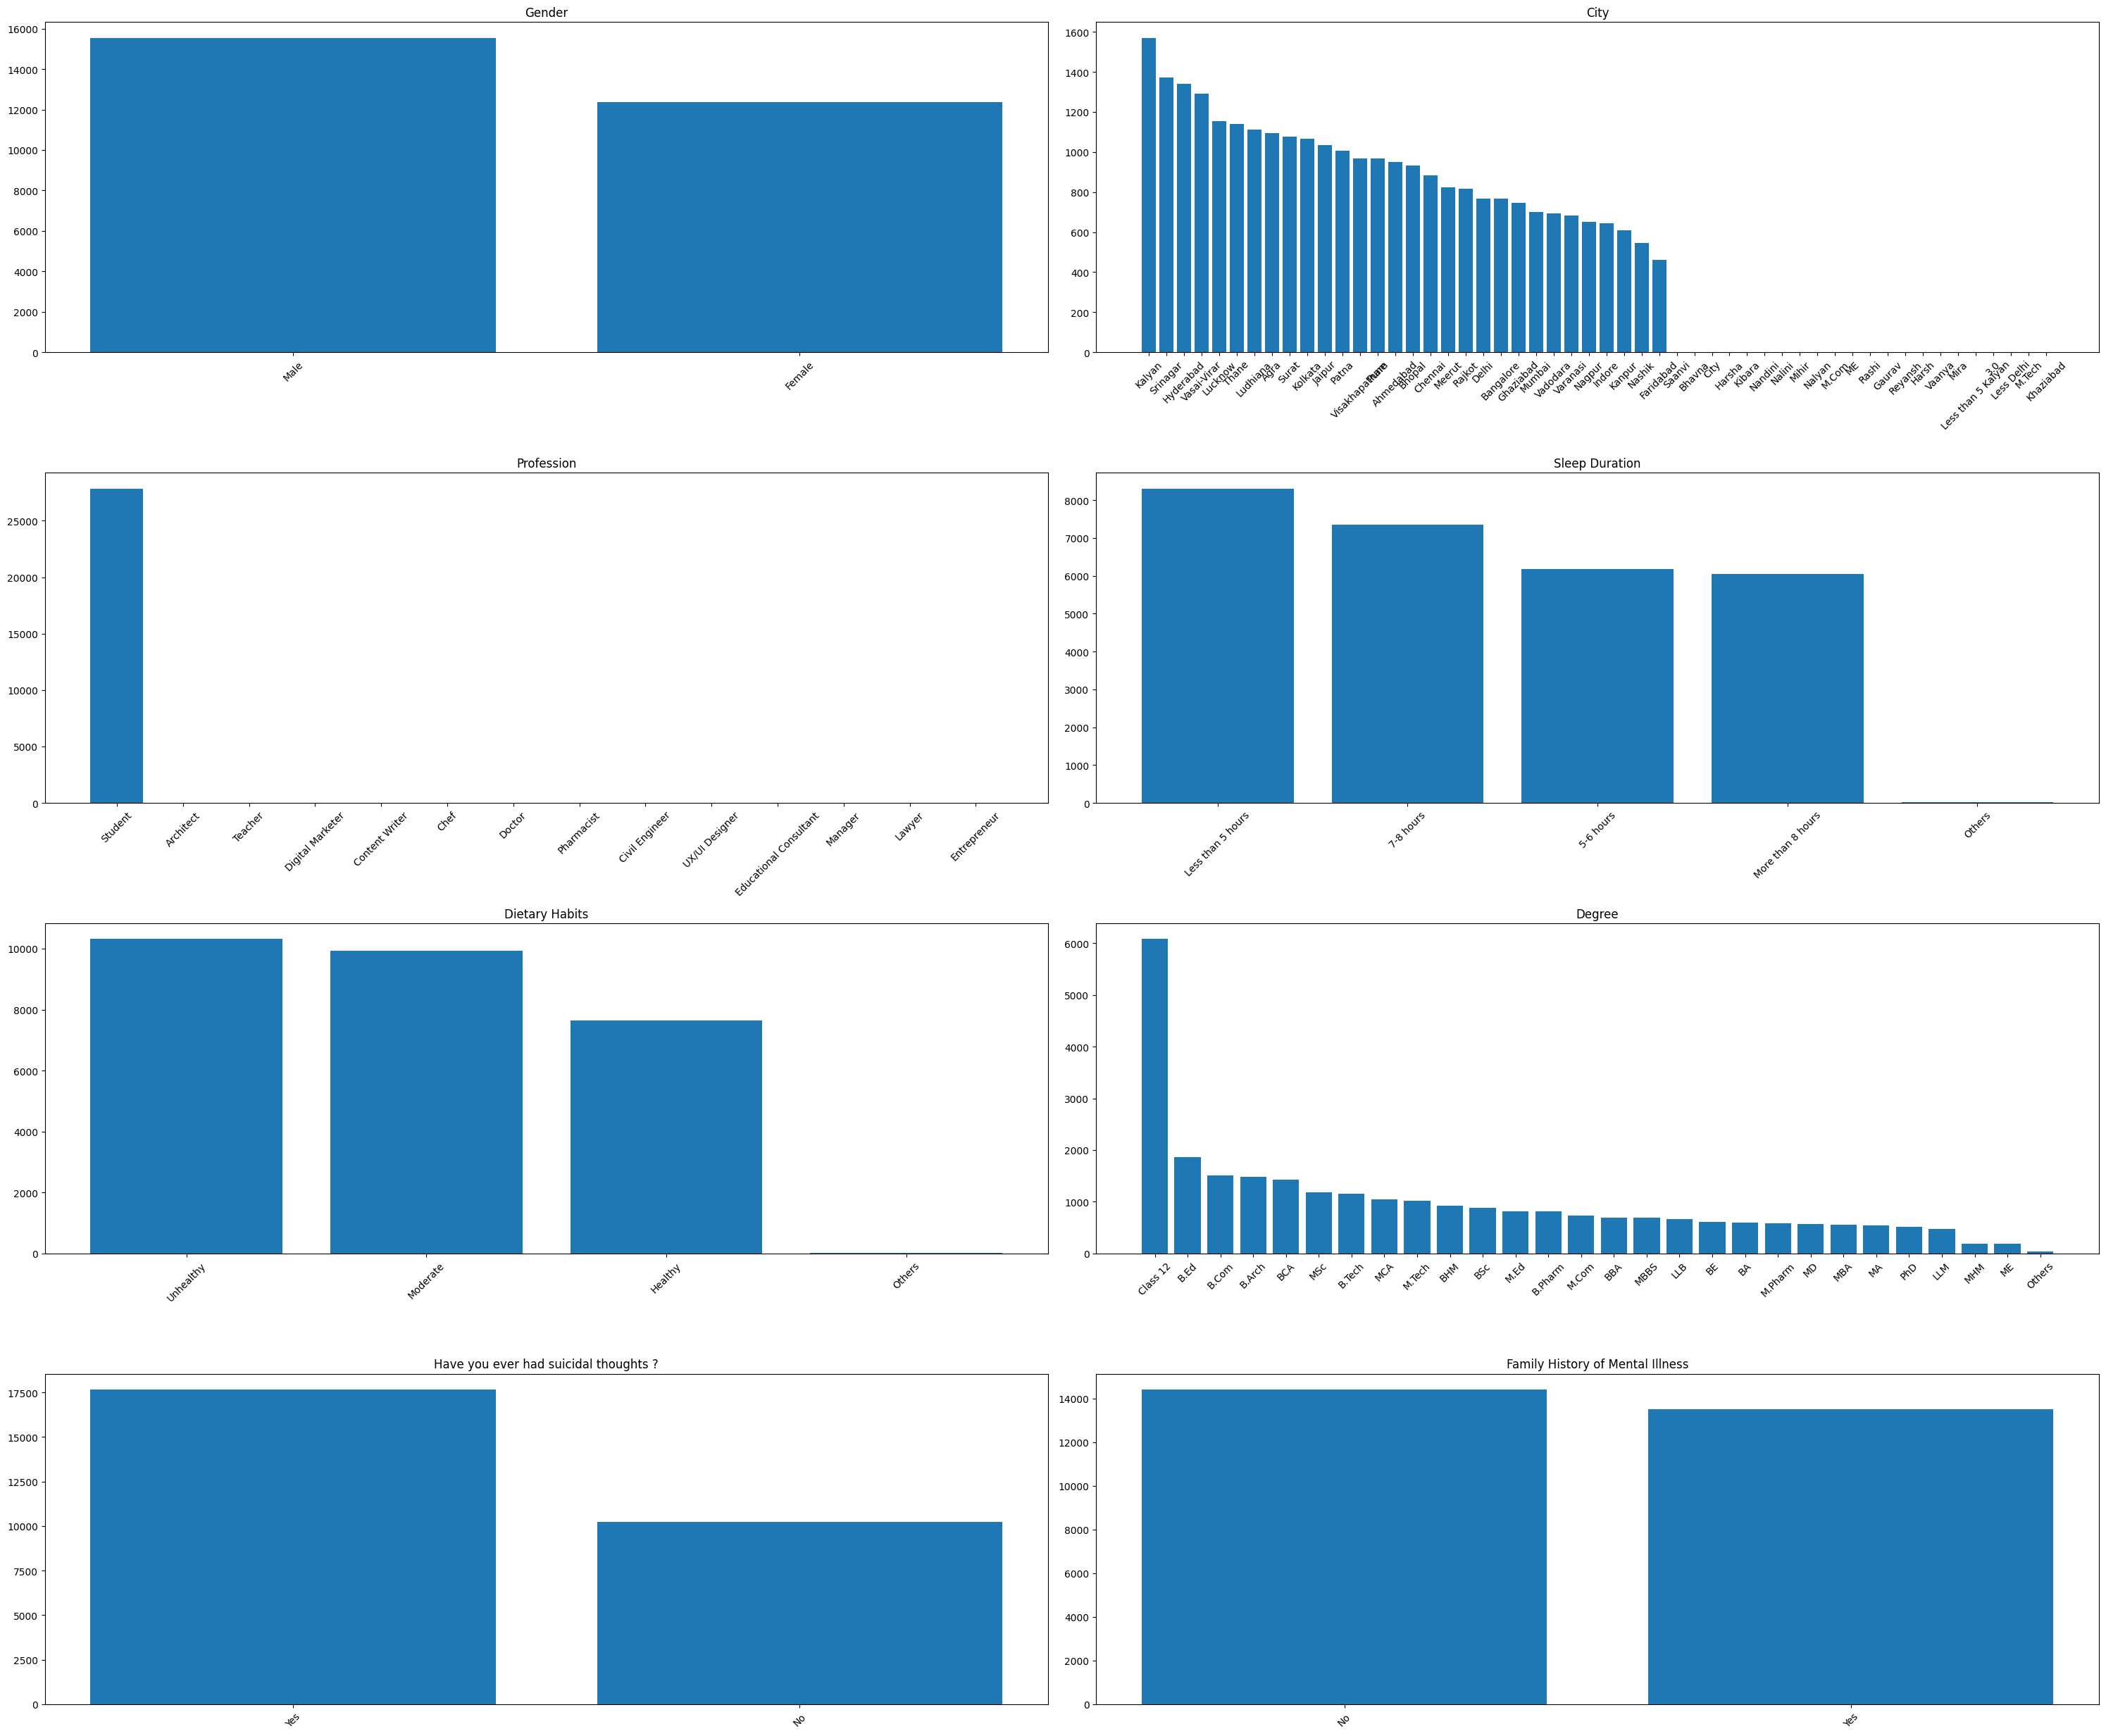

In [ ]:
categorical_cols = ['Gender', 'City', 'Profession',
                    'Sleep Duration', 'Dietary Habits', 'Degree',
                    'Have you ever had suicidal thoughts ?',
                    'Family History of Mental Illness']

plt.figure(figsize=(30,50))
for i, col in enumerate(categorical_cols):
    plt.subplot(8, 2, i+1)
    value_counts = X[col].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

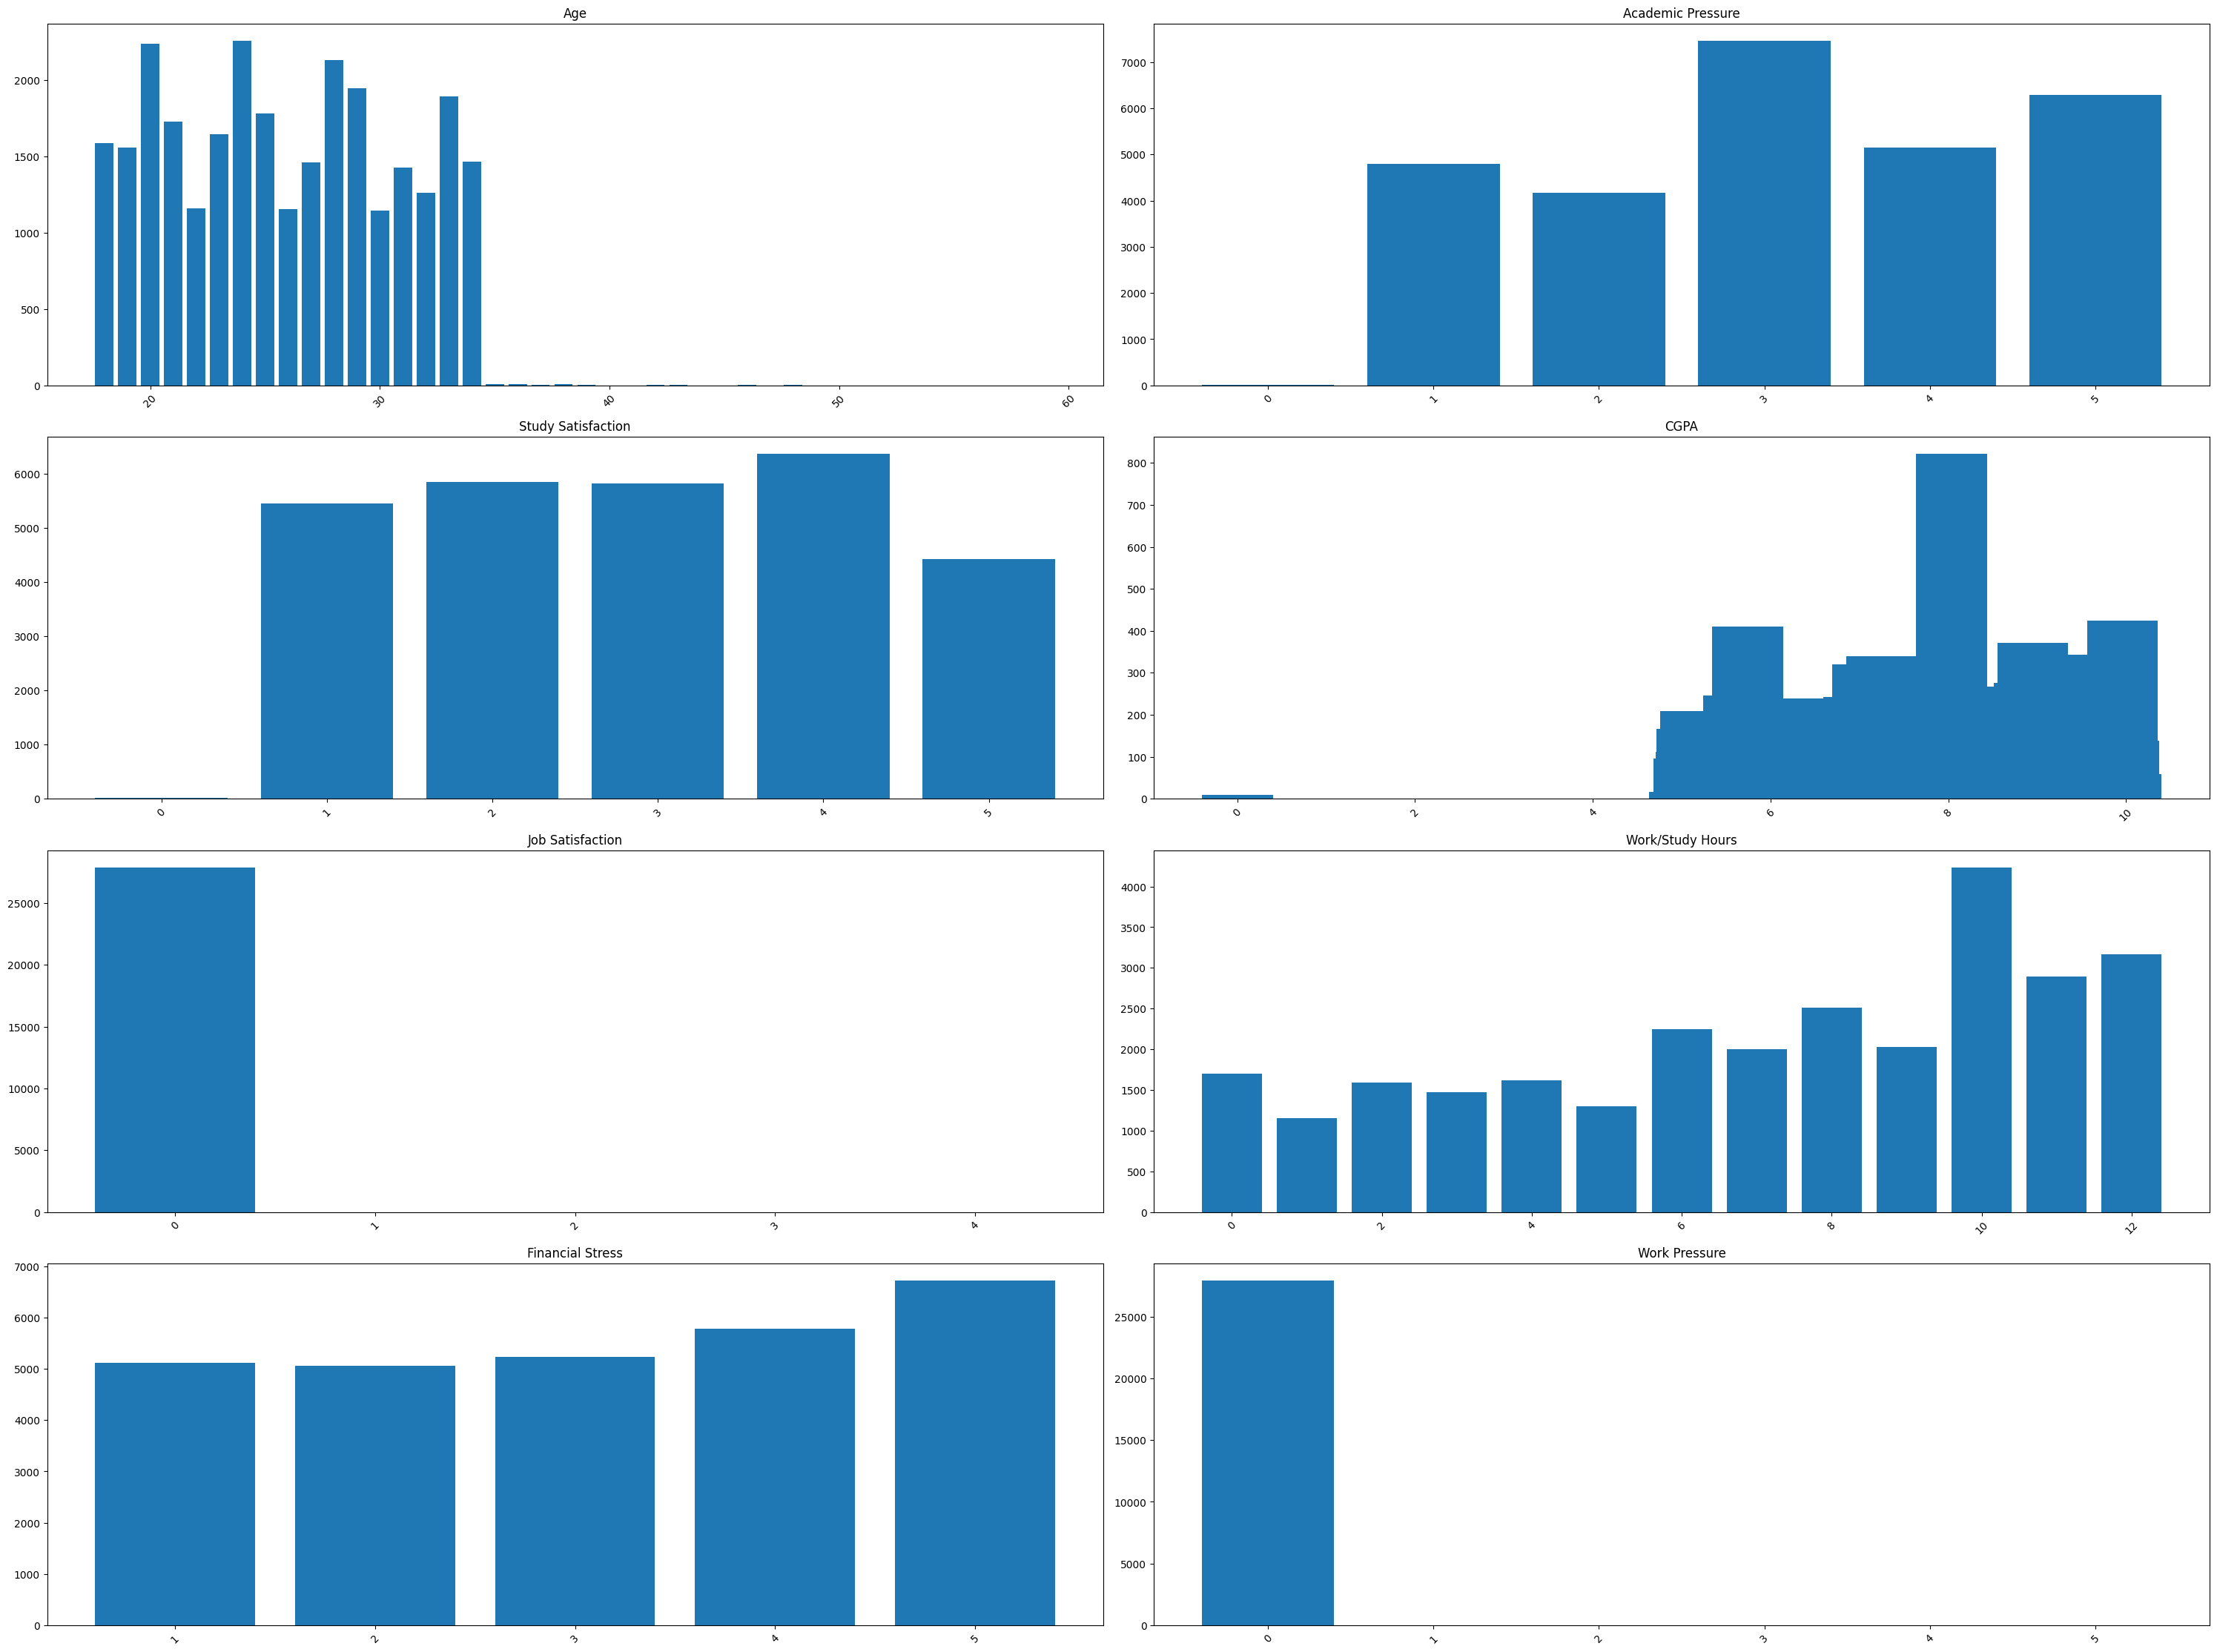

In [ ]:
numerical_cols = ['Age', 'Academic Pressure', 'Study Satisfaction',
                  'CGPA', 'Job Satisfaction',
                  'Work/Study Hours', 'Financial Stress', 'Work Pressure']

plt.figure(figsize=(30,50))
for i, col in enumerate(numerical_cols):
    plt.subplot(9,2, i+1)
    value_counts = X[col].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


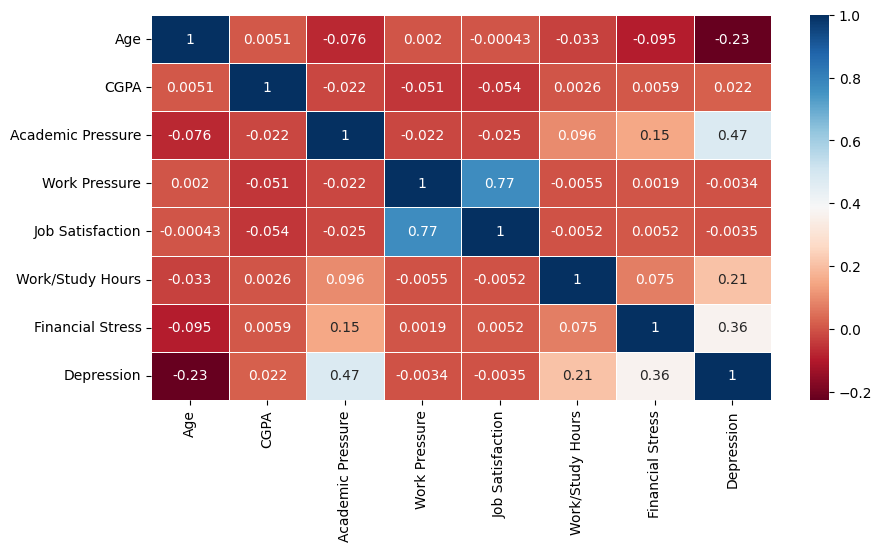

In [ ]:
numerical_columns = ['Age', 'CGPA', 'Academic Pressure', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
numerical_data = dataset[numerical_columns]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, cmap='RdBu', annot=True, linewidths=0.5)
plt.show()

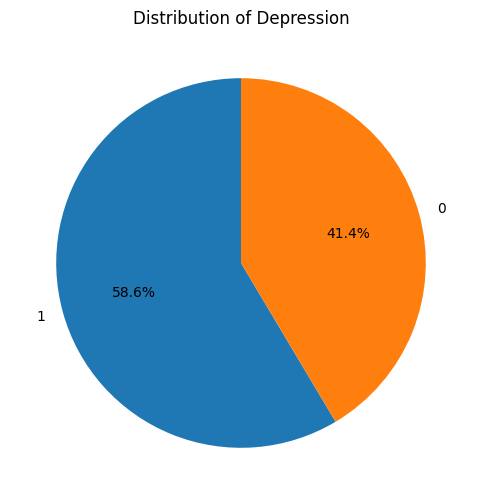

In [ ]:
depression_counts = dataset['Depression'].value_counts()

plt.figure(figsize=(10, 6))
depression_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Depression')
plt.ylabel('')
plt.show()

In [ ]:
print(dataset['Profession'].value_counts())
print("-------------------")
print(dataset['Job Satisfaction'].value_counts())
print("-------------------")
print(dataset['Work Pressure'].value_counts())

Profession
Student                   27867
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64
-------------------
Job Satisfaction
0.0    27890
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64
-------------------
Work Pressure
0.0    27895
5.0        2
2.0        1
Name: count, dtype: int64


# One Hot Encoding, Label Encoder


In [ ]:
X = X.drop(columns=["Profession", 'Work Pressure', 'Job Satisfaction'])

print(X.shape)

(27898, 13)


In [ ]:
# One-hot encoding
X = pd.get_dummies(X, columns=['Gender',
                               'Have you ever had suicidal thoughts ?',
                               'Family History of Mental Illness'])

# Label encoding
data = ['Sleep Duration', 'City', 'Dietary Habits', 'Degree']
label_encoder = LabelEncoder()
for col in data:
    X[col] = label_encoder.fit_transform(X[col])

In [ ]:
data_types = X.dtypes
print("Data Types:\n", data_types)
print("Shape X:\n", X.shape)

Data Types:
 Age                                          float64
City                                           int64
Academic Pressure                            float64
CGPA                                         float64
Study Satisfaction                           float64
Sleep Duration                                 int64
Dietary Habits                                 int64
Degree                                         int64
Work/Study Hours                             float64
Financial Stress                             float64
Gender_Female                                   bool
Gender_Male                                     bool
Have you ever had suicidal thoughts ?_No        bool
Have you ever had suicidal thoughts ?_Yes       bool
Family History of Mental Illness_No             bool
Family History of Mental Illness_Yes            bool
dtype: object
Shape X:
 (27898, 16)


# PCA

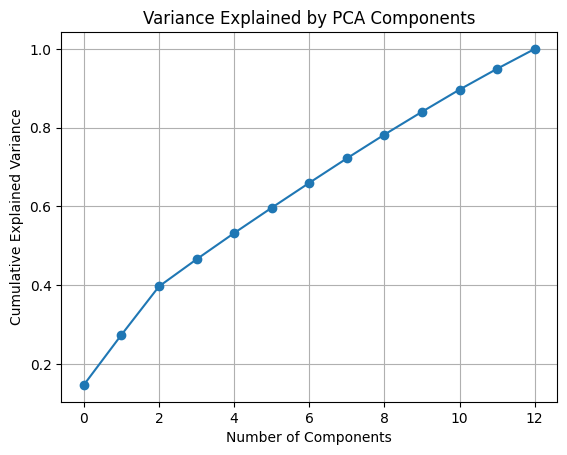

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
X_val_pca = scaler.transform(X_val_pca)

pca = PCA(n_components=0.95) #95% variance
X_train_pca = pca.fit_transform(X_train_pca) # fit transform
X_test_pca = pca.transform(X_test_pca) # transform
X_val_pca = pca.transform(X_val_pca) # transform

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.grid()
plt.show()

# K-Nearest Neighbor

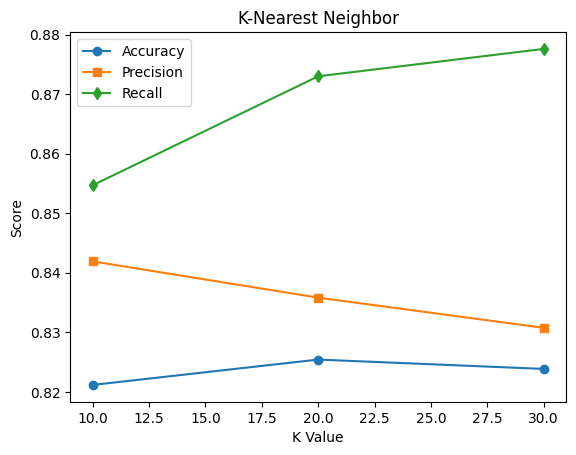

In [ ]:
scoring = ['accuracy', 'precision', 'recall']
k_value = [10, 20, 30]
mean_accuracies = []
mean_precisions = []
mean_recalls = []

for k in k_value:
  knn = KNeighborsClassifier(n_neighbors=k)
  results = cross_validate(knn, X_train_pca, y_train_pca, cv=5, scoring=scoring)
  mean_accuracy_5fold = results['test_accuracy'].mean()
  mean_precision_5fold = results['test_precision'].mean()
  mean_recall_5fold = results['test_recall'].mean()

  mean_accuracies.append(mean_accuracy_5fold)
  mean_precisions.append(mean_precision_5fold)
  mean_recalls.append(mean_recall_5fold)

plt.title("K-Nearest Neighbor")
plt.plot(k_value, mean_accuracies, label="Accuracy", marker="o")
plt.plot(k_value, mean_precisions, label="Precision", marker="s")
plt.plot(k_value, mean_recalls, label="Recall", marker="d")

plt.xlabel("K Value")
plt.ylabel("Score")
plt.legend()
plt.show()

---------Validation phase---------
Accuracy: 0.8342293906810035
Precision: 0.8500182016745541
Recall: 0.8768306421329328


---------Test phase---------
Accuracy: 0.8272401433691756
Precision: 0.828695652173913
Recall: 0.8845915841584159


Confusion Matrix:



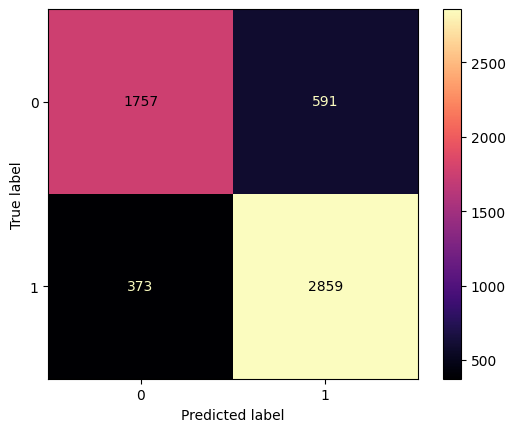

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train_pca, y_train_pca)

y_pred_val = knn.predict(X_val_pca)

accuracy = accuracy_score(y_val_pca, y_pred_val)
recall = recall_score(y_val_pca, y_pred_val, average="binary")
precision = precision_score(y_val_pca, y_pred_val, average="binary")

print("---------Validation phase---------")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\n")

y_pred_test = knn.predict(X_test_pca)

accuracy = accuracy_score(y_test_pca, y_pred_test)
recall = recall_score(y_test_pca, y_pred_test, average="binary")
precision = precision_score(y_test_pca, y_pred_test, average="binary")

print("---------Test phase---------")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\n")


cm = confusion_matrix(y_test_pca, y_pred_test)
print("Confusion Matrix:\n")
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='magma')
plt.show()


# Random Forest


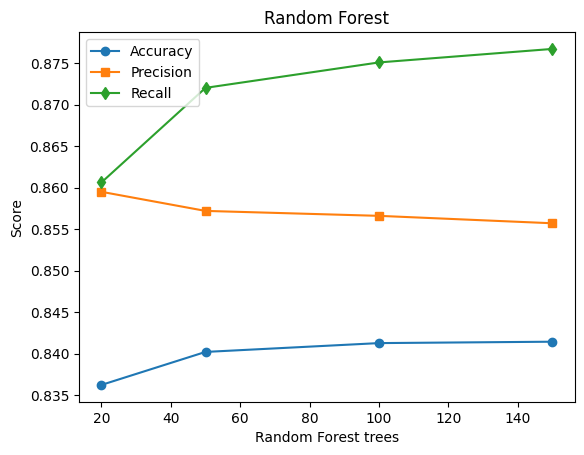

In [ ]:
scoring = ['accuracy', 'precision', 'recall']
estimators = [20, 50, 100]
mean_accuracies = []
mean_precisions = []
mean_recalls = []

for e in estimators:
  clf = RandomForestClassifier(n_estimators=e, random_state=42)
  results = cross_validate(clf, X_train_pca, y_train_pca, cv=5, scoring=scoring)
  mean_accuracy_5fold = results['test_accuracy'].mean()
  mean_precision_5fold = results['test_precision'].mean()
  mean_recall_5fold = results['test_recall'].mean()

  mean_accuracies.append(mean_accuracy_5fold)
  mean_precisions.append(mean_precision_5fold)
  mean_recalls.append(mean_recall_5fold)

plt.title("Random Forest")
plt.plot(estimators, mean_accuracies, label="Accuracy", marker="o")
plt.plot(estimators, mean_precisions, label="Precision", marker="s")
plt.plot(estimators, mean_recalls, label="Recall", marker="d")

plt.xlabel("Random Forest trees")
plt.ylabel("Score")
plt.legend()
plt.show()

---------Validation phase---------
Accuracy: 0.8436379928315412
Precision: 0.864293659621802
Recall: 0.8753285767930905


---------Test phase---------
Accuracy: 0.842831541218638
Precision: 0.8539224526600541
Recall: 0.8790222772277227


Confusion Matrix:



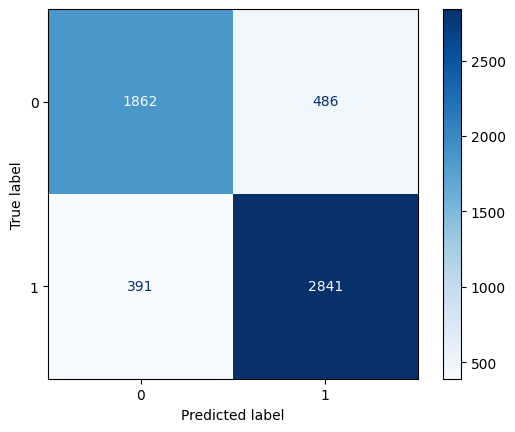

In [ ]:
clf = RandomForestClassifier(n_estimators=50, random_state=42)

clf.fit(X_train_pca, y_train_pca)

y_pred_val = clf.predict(X_val_pca)

accuracy = accuracy_score(y_val_pca, y_pred_val)
recall = recall_score(y_val_pca, y_pred_val, average="binary")
precision = precision_score(y_val_pca, y_pred_val, average="binary")

print("---------Validation phase---------")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\n")

y_pred_test = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test_pca, y_pred_test)
recall = recall_score(y_test_pca, y_pred_test, average="binary")
precision = precision_score(y_test_pca, y_pred_test, average="binary")

print("---------Test phase---------")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\n")

cm = confusion_matrix(y_test_pca, y_pred_test)
print("Confusion Matrix:\n")
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()

#SVM


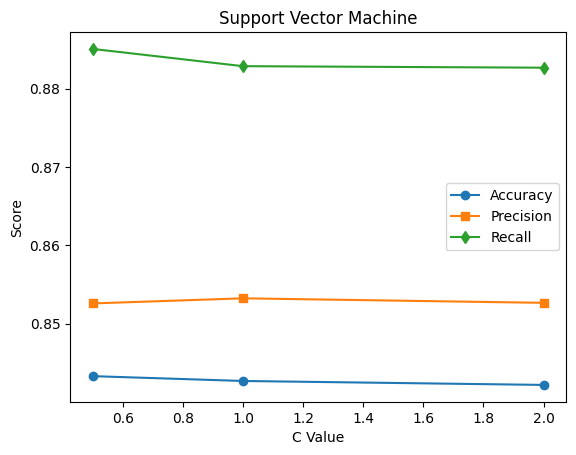

In [ ]:
scoring = ['accuracy', 'precision', 'recall']
c_values = [0.5, 1.0, 2.0]
mean_accuracies = []
mean_precisions = []
mean_recalls = []

for c_value in c_values:
  clf = svm.SVC(kernel='rbf', C=c_value)
  results = cross_validate(clf, X_train_pca, y_train_pca, cv=5, scoring=scoring)
  mean_accuracy_5fold = results['test_accuracy'].mean()
  mean_precision_5fold = results['test_precision'].mean()
  mean_recall_5fold = results['test_recall'].mean()

  mean_accuracies.append(mean_accuracy_5fold)
  mean_precisions.append(mean_precision_5fold)
  mean_recalls.append(mean_recall_5fold)

plt.title("Support Vector Machine")
plt.plot(c_values, mean_accuracies, label="Accuracy", marker="o")
plt.plot(c_values, mean_precisions, label="Precision", marker="s")
plt.plot(c_values, mean_recalls, label="Recall", marker="d")

plt.xlabel("C Value")
plt.ylabel("Score")
plt.legend()
plt.show()

---------Validation phase---------
Accuracy: 0.8469982078853047
Precision: 0.8613138686131386
Recall: 0.8862185505069471


---------Test phase---------
Accuracy: 0.8456989247311828
Precision: 0.8479600821837393
Recall: 0.8938737623762376


Confusion Matrix:



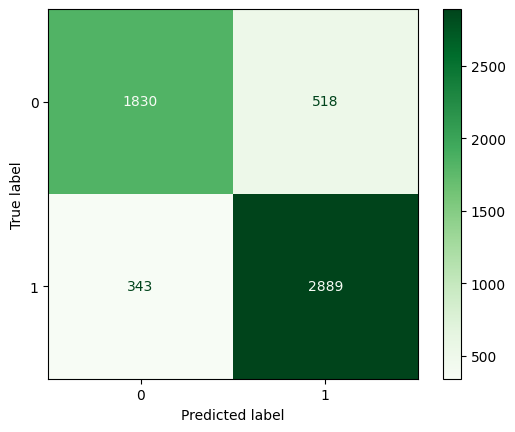

In [ ]:
clf = svm.SVC(kernel='rbf', C=1.0)

clf.fit(X_train_pca, y_train_pca)

y_pred_val = clf.predict(X_val_pca)

accuracy = accuracy_score(y_val_pca, y_pred_val)
recall = recall_score(y_val_pca, y_pred_val, average="binary")
precision = precision_score(y_val_pca, y_pred_val, average="binary")

print("---------Validation phase---------")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\n")

y_pred_test = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test_pca, y_pred_test)
recall = recall_score(y_test_pca, y_pred_test, average="binary")
precision = precision_score(y_test_pca, y_pred_test, average="binary")

print("---------Test phase---------")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\n")

cm = confusion_matrix(y_test_pca, y_pred_test)
print("Confusion Matrix:\n")
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Greens')
plt.show()